Image 1 - Min: 5456, Max: 65535
Image 2 - Min: 0.0, Max: 255.0
Image 1 - Min: 0.08325322346837567, Max: 1.0
Image 2 - Min: 0.0, Max: 1.0


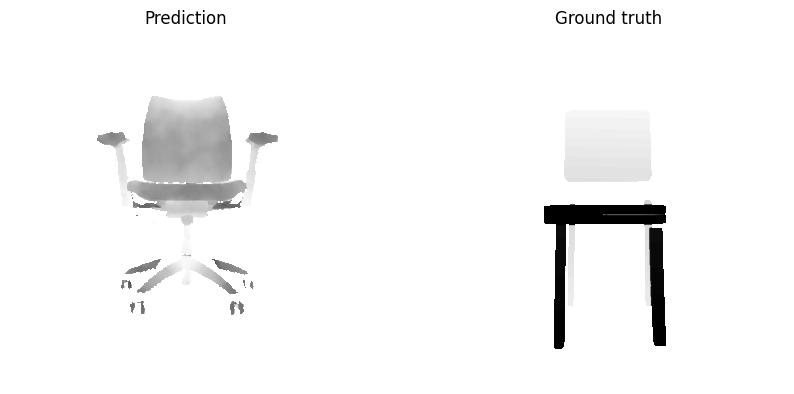

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load the images
image1_path = 'visualization_result.png'
image2_path = '/Users/cmazzoleni/Documents/GitHub/SemesterProjectETH/data/processed/chair_cuboid_6views_depth/1d6f4020cab4ec1962d6a66a1a314d66_depth_front.png'

image1 = cv2.imread(image1_path, cv2.IMREAD_UNCHANGED)  # Read the image
image1 = image1.astype(np.uint16)
image1_rescaled = image1 / 65535.0
print(f"Prediction - Min: {image1.min()}, Max: {image1.max()}")

image2 = cv2.imread(image2_path, cv2.IMREAD_UNCHANGED)  # Read the image
image2 = image2.astype(np.float32)

print(f"GT - Min: {image2.min()}, Max: {image2.max()}")

# Rescale the images to range [0, 1]
#image1_rescaled = (image1 - image1.min()) / (image1.max() - image1.min())
image2_rescaled = (image2 - image2.min()) / (image2.max() - image2.min())

print(f"Image 1 - Min: {image1_rescaled.min()}, Max: {image1_rescaled.max()}")
print(f"Image 2 - Min: {image2_rescaled.min()}, Max: {image2_rescaled.max()}")

# Mask out values that are exactly 0 or 1 by replacing them with NaN
image1_rescaled = np.where((image1_rescaled == 0) | (image1_rescaled == 1), np.nan, image1_rescaled)
image2_rescaled = np.where((image2_rescaled == 0) | (image2_rescaled == 1), np.nan, image2_rescaled)


# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image
cax1 = axes[0].imshow(image1_rescaled, cmap='gray')  # Use 'gray' for grayscale images if needed
axes[0].axis('off')  # Hide axes
axes[0].set_title('Prediction')

# Display the second image
cax2 = axes[1].imshow(image2_rescaled, cmap='gray')  # Use 'gray' for grayscale images if needed
axes[1].axis('off')  # Hide axes
axes[1].set_title('Ground truth')

# Show the figure
plt.show()



In [11]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

gt_path = "/Users/cmazzoleni/Documents/GitHub/SemesterProjectETH/data/processed/chair_cuboid_6views_depth/1d6f4020cab4ec1962d6a66a1a314d66_depth_front.png"

#READING
gt_image = Image.open(gt_path)
png_image = Image.open(gt_path)
gt_image = np.array(gt_image)
#normalize betwween -1 and 1
gt_image = gt_image/255 * 2.0 - 1.0


#WRTING
gt_image = (gt_image + 1.0) / 2.0
gt_image = np.clip(gt_image, 0, 1)
gt_image = (gt_image * 65535.0).astype(np.uint16)


png_path = "rewritten_image.png"
Image.fromarray(gt_image).save(png_path)




In [13]:
gt_image = Image.open(gt_path)
png_image = Image.open(png_path)

print(np.min(gt_image))
print(np.max(gt_image))
print(np.min(png_image))
print( np.max(png_image))


gt_image = np.array(gt_image) / 255.0
png_image = np.array(png_image) / 65535.0
result = np.sum(np.abs(np.array(gt_image) - np.array(png_image)))
print(result)


0
255
0
65535
0.0


In [10]:
gt_image = Image.open(gt_path)
png_image = Image.open(png_path)

#compare images
diff = Image.fromarray(np.abs(np.array(gt_image) - np.array(png_image)))

#sum of differences
result = np.sum(np.abs(np.array(gt_image) - np.array(png_image)))
print(result)

0


0
1207
0
65535
difference: 2336157103


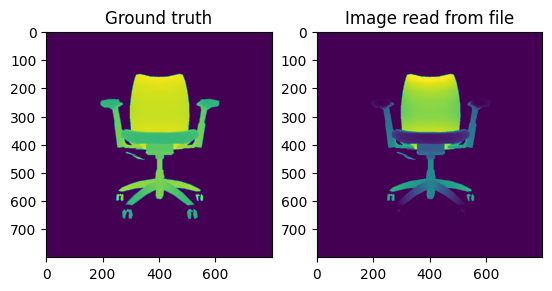

In [30]:
decoded_image_path = "try_encode-2.png"
gt_image_path = "front_view_depth_o3d_mesh.png"


gt_png = Image.open(gt_image_path)
decoded_png = Image.open(decoded_image_path)

print(np.min(gt_png))
print(np.max(gt_png))
print(np.min(decoded_png))
print( np.max(decoded_png))

#reverse decoded png
decoded_png = np.array(decoded_png)
"""
decoded_png = decoded_png / 255.0
decoded_png = 1 - decoded_png
#clip
decoded_png = np.clip(decoded_png, 0, 1)
decoded_png = decoded_png * 255.0
"""

#sum of differences
result = np.sum(np.abs(np.array(gt_png).astype(np.uint8) - np.array(decoded_png)))
print(f"difference: {result}")

#visualize 2 images
#add titles to the images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(gt_png)
ax[0].set_title("Ground truth")
ax[1].imshow(decoded_png)
ax[1].set_title("Image read from file")
plt.show()

